In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Automobile_data.csv")

print(df.info())

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             61 non-null     int64  
 1   company           61 non-null     object 
 2   body-style        61 non-null     object 
 3   wheel-base        61 non-null     float64
 4   length            61 non-null     float64
 5   engine-type       61 non-null     object 
 6   num-of-cylinders  61 non-null     object 
 7   horsepower        61 non-null     int64  
 8   average-mileage   61 non-null     int64  
 9   price             58 non-null     float64
dtypes: float64(3), int64(3), object(4)
memory usage: 4.9+ KB
None


,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
0,0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0


# Exercise

> 1. what is the average price and average mileage for convertible cars
> 2. Sort cars by company and price in decending order
> 3. Save data for 'Toyota' separately
> 4. which company is producing most expensive car?
> 5. Name the cars on basis of maximum length, highest wheelbase, maximum horsepower 
> 6. company wise average price of cars and order them in decending order
> 7. create a column named: "decision", If wheel-base is less than 100 and length is less than 175 then "don't buy" else "buy"
> 8. Select only cars whose decision is "buy"; find average price based on company of car

In [3]:
#1
convertibledf= df.loc[df["body-style"]=="convertible"]
print(convertibledf.groupby(["body-style"])["average-mileage"].agg([np.mean]).rename(columns={"mean":"Average-mileage of convertible cars"}))
convertibledf.groupby(["body-style"])["price"].agg([np.mean]).rename(columns={"mean":"Average-price of convertible cars"})

             Average-mileage of convertible cars
body-style                                      
convertible                            19.666667


,Average-price of convertible cars
body-style,
convertible,22341.0


In [18]:
#1
convertibledf= df.loc[df["body-style"]=="convertible"]
df1=convertibledf[['price','average-mileage']].mean()
df1


price              22341.000000
average-mileage       19.666667
dtype: float64

In [5]:
#2
df2=df.sort_values(by=["company","price"],ascending=False)
df2

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
60,88,volvo,wagon,104.3,188.8,ohc,four,114,23,13415.0
59,87,volvo,sedan,104.3,188.8,ohc,four,114,23,12940.0
58,86,volkswagen,sedan,97.3,171.7,ohc,four,100,26,9995.0
57,82,volkswagen,sedan,97.3,171.7,ohc,four,52,37,7995.0
56,81,volkswagen,sedan,97.3,171.7,ohc,four,85,27,7975.0
...,...,...,...,...,...,...,...,...,...,...
5,5,audi,sedan,99.8,177.3,ohc,five,110,19,15250.0
3,3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
1,1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0


In [6]:
#question 3
df3= df.loc[df["company"]=="toyota"]
df3

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
48,66,toyota,hatchback,95.7,158.7,ohc,four,62,35,5348.0
49,67,toyota,hatchback,95.7,158.7,ohc,four,62,31,6338.0
50,68,toyota,hatchback,95.7,158.7,ohc,four,62,31,6488.0
51,69,toyota,wagon,95.7,169.7,ohc,four,62,31,6918.0
52,70,toyota,wagon,95.7,169.7,ohc,four,62,27,7898.0
53,71,toyota,wagon,95.7,169.7,ohc,four,62,27,8778.0
54,79,toyota,wagon,104.5,187.8,dohc,six,156,19,15750.0


In [7]:
#4
df4=pd.DataFrame([df.sort_values("price",ascending=False).iloc[0]['company']])
df4

,0
0,mercedes-benz


In [8]:
#5
lmax=df.sort_values("length", ascending=False).iloc[0]["company"]
hmax=df.sort_values("horsepower", ascending=False).iloc[0]["company"]
wmax=df.sort_values("wheel-base", ascending=False).iloc[0]["company"]
lmax,hmax,wmax
df5=pd.DataFrame({"length":[lmax],"horsepowe":[hmax],"wheelbase":[wmax]})
df5


,length,horsepowe,wheelbase
0,mercedes-benz,porsche,mercedes-benz


In [9]:
#6
df6=pd.DataFrame(df.groupby(["company"])["price"].mean())
df6.sort_values("price",ascending=False)

,price
company,
porsche,35528.000000
mercedes-benz,35040.000000
jaguar,34600.000000
bmw,27213.333333
audi,16392.500000
alfa-romero,15498.333333
volvo,13177.500000
honda,10195.000000
mazda,9654.800000


In [10]:
#7
df["decision"]=np.where((df["wheel-base"]<100)&(df["length"]<175),"don't buy","buy")


In [11]:
#8
buyc=df.loc[df["decision"]=="buy"]
df8=pd.DataFrame(buyc.groupby(["company"])["price"].mean())
df8

,price
company,
audi,16392.500000
bmw,27213.333333
honda,12945.000000
jaguar,34600.000000
mazda,18344.000000
mercedes-benz,35040.000000
nissan,13499.000000
porsche,NaN
toyota,15750.000000


In [15]:
#1
convertibledf= df.loc[df["body-style"]=="convertible"]
df1=convertibledf[['price','average-mileage']].mean()
#2
df2=df.sort_values(by=["company","price"],ascending=False)
#question 3
df3= df.loc[df["company"]=="toyota"]
#4
df4=pd.DataFrame([df.sort_values("price",ascending=False).iloc[0]['company']])
#5
lmax=df.sort_values("length", ascending=False).iloc[0]["company"]
hmax=df.sort_values("horsepower", ascending=False).iloc[0]["company"]
wmax=df.sort_values("wheel-base", ascending=False).iloc[0]["company"]
lmax,hmax,wmax
df5=pd.DataFrame({"length":[lmax],"horsepowe":[hmax],"wheelbase":[wmax]})
#6
df6=pd.DataFrame(df.groupby(["company"])["price"].mean())
df6.sort_values("price",ascending=False)
#7
df["decision"]=np.where((df["wheel-base"]<100)&(df["length"]<175),"don't buy","buy")
df7=pd.DataFrame(df)
#8
buyc=df.loc[df["decision"]=="buy"]
df8=pd.DataFrame(buyc.groupby(["company"])["price"].mean())
with pd.ExcelWriter("pafinal1.xlsx")as writer:
    df1.to_excel(writer, sheet_name='output1', index=False)
    df2.to_excel(writer, sheet_name='output2', index=False)
    df3.to_excel(writer, sheet_name='output3', index=False)
    df4.to_excel(writer, sheet_name='output4', index=False)
    df5.to_excel(writer, sheet_name='output5', index=False)
    df6.to_excel(writer, sheet_name='output6', index=False)
    df7.to_excel(writer, sheet_name='output7', index=False)
    df8.to_excel(writer, sheet_name='output8', index=False)


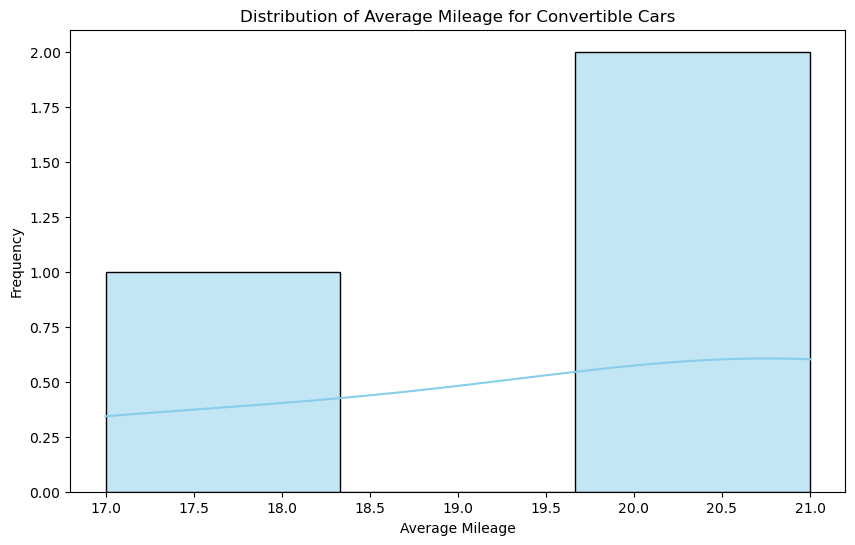

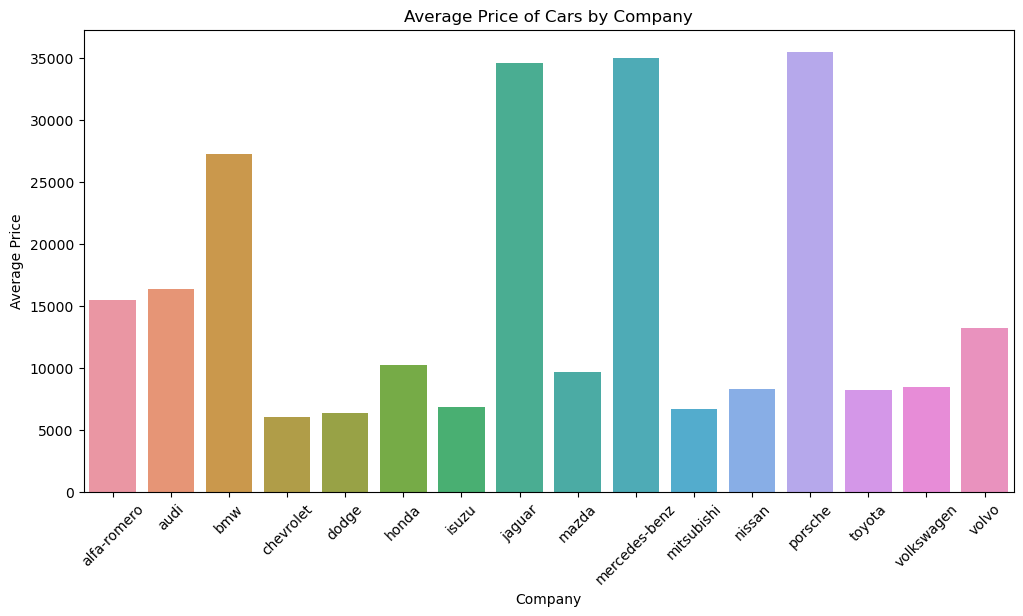

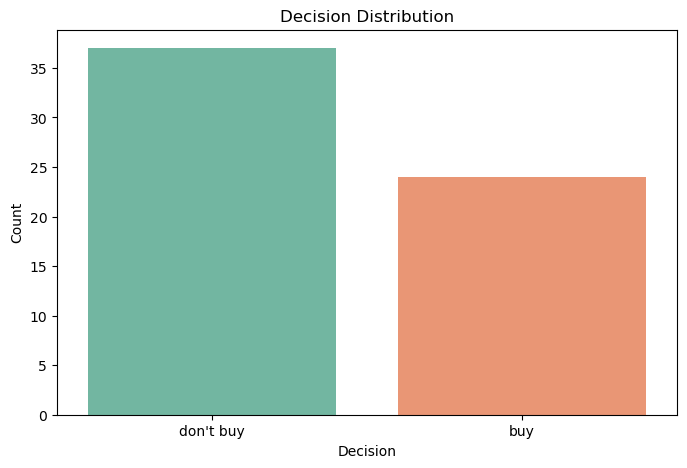

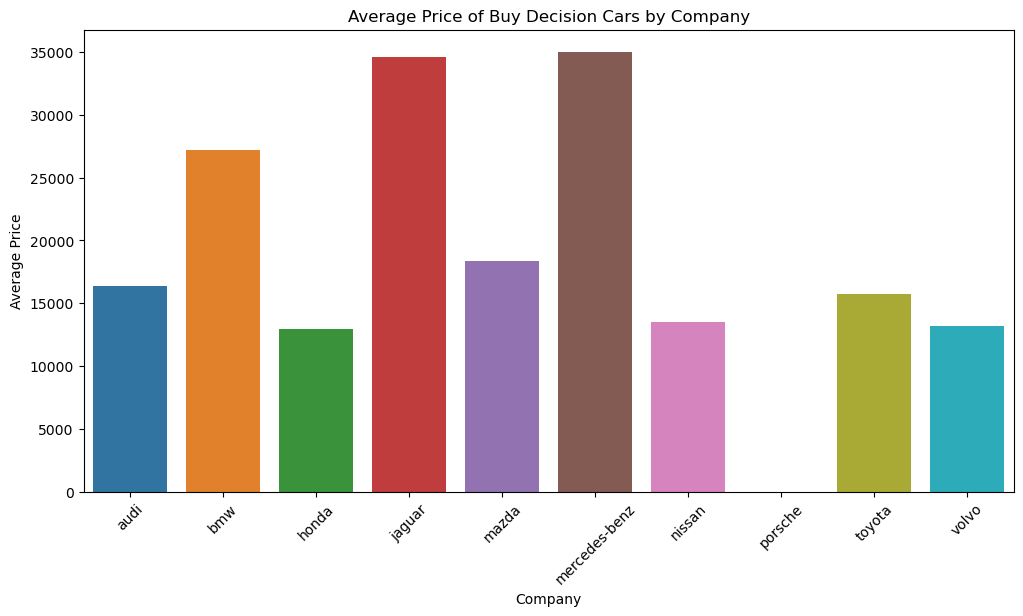

In [20]:
# Visualize the distribution of average mileage for convertible cars
convertible_df = df[df["body-style"] == "convertible"]
plt.figure(figsize=(10, 6))
sns.histplot(convertible_df["average-mileage"], kde=True, color='skyblue')
plt.title("Distribution of Average Mileage for Convertible Cars")
plt.xlabel("Average Mileage")
plt.ylabel("Frequency")
plt.show()

# Sort cars by company and price in descending order
sorted_df = df.sort_values(by=["company", "price"], ascending=False)

# Visualize the average price of cars by company
plt.figure(figsize=(12, 6))
sns.barplot(x="company", y="price", data=df, ci=None, estimator=np.mean)
plt.title("Average Price of Cars by Company")
plt.xlabel("Company")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()

# Create a column named "decision" based on criteria
df["decision"] = np.where((df["wheel-base"] < 100) & (df["length"] < 175), "don't buy", "buy")

# Visualize the decision distribution
plt.figure(figsize=(8, 5))
sns.countplot(x="decision", data=df, palette="Set2")
plt.title("Decision Distribution")
plt.xlabel("Decision")
plt.ylabel("Count")
plt.show()

# Select only cars whose decision is "buy" and find average price based on company
buy_cars = df[df["decision"] == "buy"]
company_avg_price = buy_cars.groupby("company")["price"].mean().reset_index()

# Visualize the average price of buy decision cars by company
plt.figure(figsize=(12, 6))
sns.barplot(x="company", y="price", data=company_avg_price, ci=None)
plt.title("Average Price of Buy Decision Cars by Company")
plt.xlabel("Company")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()

